# Copyright Netherlands eScience Center <br>
** Function     : Analyze AMET from coordinated experiments** <br>
** Author       : Yang Liu ** <br>
** First Built  : 2019.08.09 ** <br>
** Last Update  : 2019.08.09 ** <br>
Description     : This notebook aims to analyze AMET taken as the residuals of TOA/surface flux fields from multiple coordinated experiments in Blue Action WP3. It contributes to the Deliverable 3.1. <br>
Return Values   : netCDF4 <br>
Caveat          : The fields used here are post-processed monthly mean fields. It includes AMET from:
* EC Earth (DMI)
* CMCC-CM (CMCC)
* WACCM6 (WHOI)
* NorESM (NERSC)
* HadGEM  (UoS)
* EC Earth (NLeSC)

In [8]:
%matplotlib inline
import numpy as np
import sys
sys.path.append("/home/ESLT0068/NLeSC/Computation_Modeling/Bjerknes/Scripts/META")
import scipy as sp
import time as tttt
from netCDF4 import Dataset,num2date
import os
import meta.statistics
import meta.visualizer
import matplotlib.pyplot as plt

In [4]:
# constants
constant = {'g' : 9.80616,      # gravititional acceleration [m / s2]
            'R' : 6371009,      # radius of the earth [m]
            'cp': 1004.64,      # heat capacity of air [J/(Kg*K)]
            'Lv': 2264670,      # Latent heat of vaporization [J/Kg]
            'R_dry' : 286.9,    # gas constant of dry air [J/(kg*K)]
            'R_vap' : 461.5,    # gas constant for water vapour [J/(kg*K)]
            }

|Model and Organization | Exp 1 | Exp 2 | Exp 3 | Exp 4 |    time   |
|-----------------------|-------|-------|-------|-------|-----------|
|     EC Earth (DMI)    |   20  |   20  |   20  |   20  | 1979-2013 (exp1&2) 1979-2015 (exp3&4) |
|     CMCC-CM (CMCC)    |   10  |   10  |   0   |   0   | 1979-2014 |
|      WACCM6 (WHOI)    |   30  |   30  |   0   |   0   | 1979-2014 |
|     NorESM (NERSC)    |   20  |   20  |   20  |   20  | 1979-2014 |
|     HadGEM  (UoS)     |   10  |   10  |   5   |   5   | 1979-2014 |

In [5]:
################################   Input zone  ######################################
# specify starting and ending time
# specify data path
datapath = '/home/ESLT0068/WorkFlow/Core_Database_BlueAction_WP3/AMET_netCDF'
# specify output path for figures
output_path = '/home/ESLT0068/NLeSC/Computation_Modeling/BlueAction/WP3/JointAnalysis_AMET'
####################################################################################

In [12]:
################################   Extract variables  ######################################
# get path
# EC Earth (DMI)
datapath_DMI_exp1 = os.path.join(datapath, 'amet_ECEarth_DMI_exp1.nc')
datapath_DMI_exp2 = os.path.join(datapath, 'amet_ECEarth_DMI_exp2.nc')
datapath_DMI_exp3 = os.path.join(datapath, 'amet_ECEarth_DMI_exp3.nc')
datapath_DMI_exp4 = os.path.join(datapath, 'amet_ECEarth_DMI_exp4.nc')
# WACCM6 (WHOI)
datapath_WHOI_exp1 = os.path.join(datapath, 'amet_WACCM6_WHOI_exp1.nc')
datapath_WHOI_exp2 = os.path.join(datapath, 'amet_WACCM6_WHOI_exp2.nc')
# get variable key
# EC Earth (DMI)
key_DMI_exp1 = Dataset(datapath_DMI_exp1)
key_DMI_exp2 = Dataset(datapath_DMI_exp2)
key_DMI_exp3 = Dataset(datapath_DMI_exp3)
key_DMI_exp4 = Dataset(datapath_DMI_exp4)

key_WHOI_exp1 = Dataset(datapath_WHOI_exp1)
key_WHOI_exp2 = Dataset(datapath_WHOI_exp2)
# get amet
AMET_DMI_exp1 = key_DMI_exp1.variables['amet'][:]
AMET_DMI_exp2 = key_DMI_exp2.variables['amet'][:]
AMET_DMI_exp3 = key_DMI_exp3.variables['amet'][:]
AMET_DMI_exp4 = key_DMI_exp4.variables['amet'][:]

AMET_WHOI_exp1 = key_DMI_exp1.variables['amet'][:]
AMET_WHOI_exp2 = key_DMI_exp2.variables['amet'][:]

lat_DMI = key_DMI_exp1.variables['latitude'][:]

(20, 37, 12, 256)


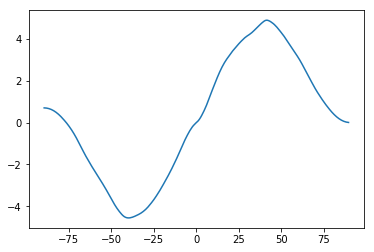

In [13]:
print(AMET_DMI.shape)
plt.plot(lat_DMI, np.mean(AMET_DMI[0,0,:,:],0))